## 호기별 열별 불량 개수 

In [ ]:
# 호기와 열 레이블 설정
defect_counts = np.array([
    [57, 44],
    [48, 44],
    [60, 57]
])
fur_nos = ['1호기', '2호기', '3호기']
fur_input_rows = ['1열', '2열']

# 막대 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 각 막대의 너비와 위치 설정
bar_width = 0.2
x_positions = np.arange(len(fur_nos))

# 각 호기와 열별로 막대 그래프 생성
for i, row_label in enumerate(fur_input_rows):
    ax.bar(x_positions + (i - 1) * bar_width, defect_counts[:, i], width=bar_width, label=row_label)

# x축 레이블과 위치 설정
ax.set_xticks(x_positions)
ax.set_xticklabels(fur_nos)
ax.set_xlabel('호기')
ax.set_ylabel('불량 갯수')

# 범례 추가
ax.legend()

# 그래프 제목
plt.title('각 호기와 열별 불량 갯수')

# 그래프 보여주기
plt.show()

# 의사결정나무

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [19]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/SCALE불량.csv", encoding='euc-kr')


KeyError: ''

In [21]:

type(df_raw["fur_input_row"])

pandas.core.series.Series

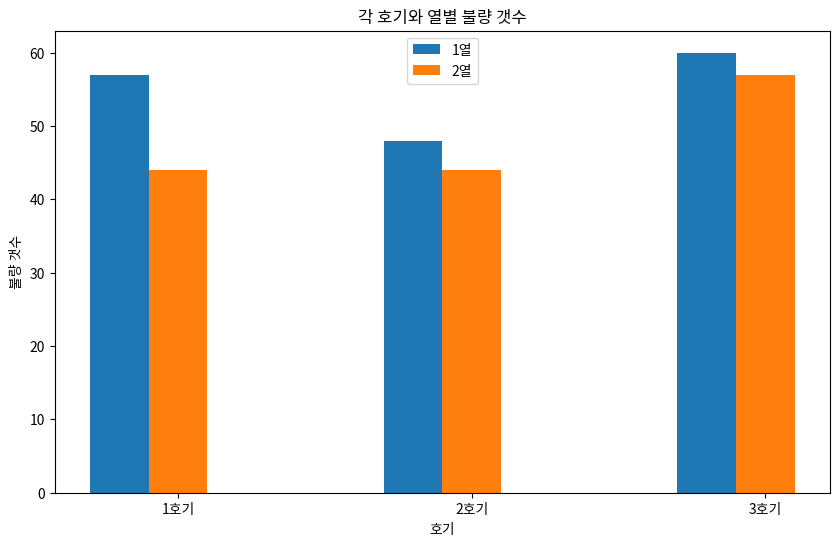

In [4]:
# x,y로 분리
df_raw_x=df_raw.drop("scale", axis=1, inplace=False)
df_raw_y=df_raw["scale"]
df_raw_y.value_counts()

양품    690
불량    310
Name: scale, dtype: int64

In [5]:
# 불량 -> 0 , 양품 -> 1
df_raw_y=df_raw["scale"].replace({"불량": 0, "양품":1})
df_raw_y.value_counts()


1    690
0    310
Name: scale, dtype: int64

In [6]:
# train, test split 7:3
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state=6659)
print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터: Train", df_train_x.shape,"Test", df_test_x.shape)

분할 전 설명변수 데이터: (1000, 21)
분할 후 설명변수 데이터: Train (700, 21) Test (300, 21)


## 최종모델 : 의사결정나무

In [9]:
# default model
tree_final=DecisionTreeRegressor(random_state=6659)
tree_final.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("Score on testing set: {:.3f}".format(tree_final.score(df_test_x,df_test_y)))


ValueError: could not convert string to float: 'PLT_1094'

#### 변수 중요도 : 의사결정나무

In [ ]:
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= tree_final.feature_importances_
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

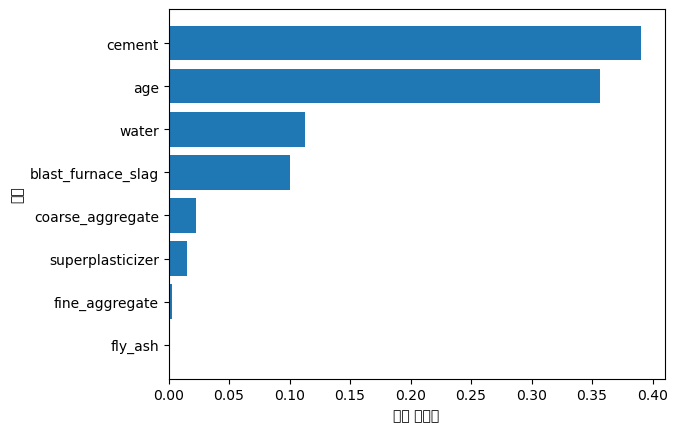

In [ ]:
df_importance.sort_values("importance",ascending=True, inplace= True) 
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.show()

# RandomForest

In [10]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

In [11]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/SCALE불량.csv", encoding='euc-kr')
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [ ]:
# x,y로 분리
df_raw_x=df_raw.drop("scale", axis=1, inplace=False)
df_raw_y=df_raw["scale"]
df_raw_y.value_counts()

In [ ]:
# 불량 -> 0 , 양품 -> 1
df_raw_y=df_raw["scale"].replace({"불량": 0, "양품":1})
df_raw_y.value_counts()


In [ ]:
# train, test split 7:3
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state=6659)
print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터: Train", df_train_x.shape,"Test", df_test_x.shape)

In [ ]:
# default model
rf_uncustomized = RandomForestRegressor(random_state=6659)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.981
Score on test set:0.886


In [ ]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 6659,
 'verbose': 0,
 'warm_start': False}

#### 최적 파라미터 : GridSearch

In [ ]:
estimator= RandomForestRegressor(random_state=6659)
para_depth=[depth for depth in range(1,11)]
para_leaf=[n_leaf for n_leaf in range(1,21)]
para_split=[n_split*2 for n_split in range(2,21)]

param_grid={"max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_rf=GridSearchCV(estimator,param_grid,scoring="r2", n_jobs= -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=10, min_samples_split=4, random_state=6659)

best parameter:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score:
0.87


## 최종모델 : RandomForest

In [ ]:
rf_final= RandomForestRegressor(n_estimators=20,random_state=6659, min_samples_leaf=1, min_samples_split=4, max_depth=10)
rf_final.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.981
Score on test set:0.886


#### 변수중요도 : RandomForest

In [ ]:
v_feature_name= df_train_x.columns
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= rf_final.feature_importances_
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

Text(0, 0.5, '설명변수')

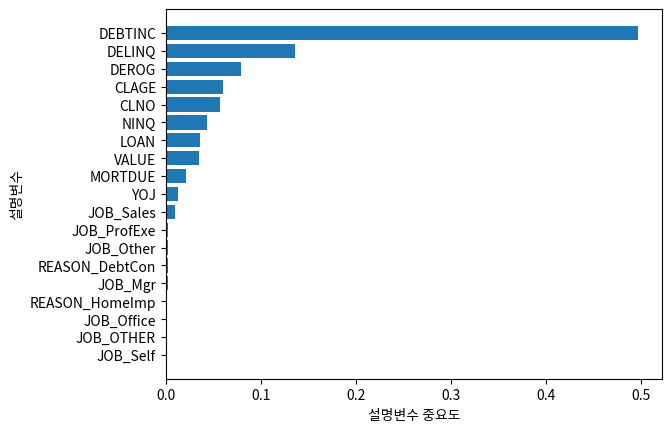

In [ ]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# Gradient Boosting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [12]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/SCALE불량.csv", encoding='euc-kr')
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [13]:
# x,y로 분리
df_raw_x=df_raw.drop("scale", axis=1, inplace=False)
df_raw_y=df_raw["scale"]
df_raw_y.value_counts()

양품    690
불량    310
Name: scale, dtype: int64

In [ ]:
# 불량 -> 0 , 양품 -> 1
df_raw_y=df_raw["scale"].replace({"불량": 0, "양품":1})
df_raw_y.value_counts()


In [ ]:
# train, test split 7:3
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state=6659)
print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터: Train", df_train_x.shape,"Test", df_test_x.shape)

In [ ]:
# default model
gb_uncustomized = GradientBoostingRegressor(random_state=6659)
gb_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.952
Score on test set:0.893


In [ ]:
gb_uncustomized.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 6659,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### 최적 파라미터 : ntree

In [ ]:
train_score=[]; test_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree :
    gb= GradientBoostingRegressor(n_estimators=v_n_estimators,random_state=6659)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

In [ ]:
df_score_n= pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n["TrainScore"]= train_score
df_score_n["TestScore"]=test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.637,0.608
1,20,0.805,0.762
2,30,0.868,0.818
3,40,0.898,0.848
4,50,0.916,0.865
5,60,0.929,0.874
6,70,0.936,0.880
7,80,0.944,0.885
8,90,0.947,0.888
9,100,0.952,0.893


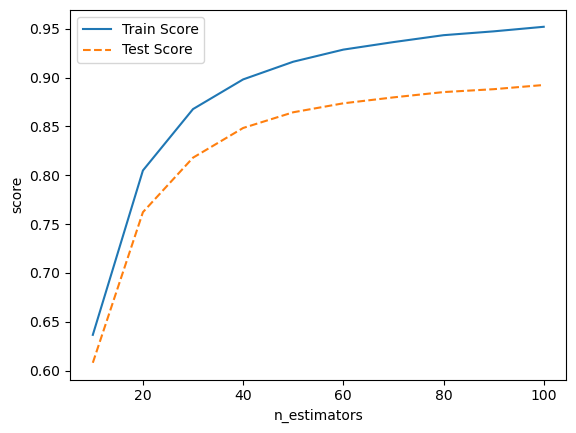

In [ ]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()
plt.show()

#### 최적 파라미터 : min_samples_leaf

In [ ]:
train_score=[]; test_score=[]
para_leaf=[n_leaf for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf :
    gb= GradientBoostingRegressor(n_estimators=40,random_state=6659, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

In [ ]:
df_score_leaf= pd.DataFrame()
df_score_leaf["MinSampleLeaf"] =para_leaf
df_score_leaf["TrainScore"]= train_score
df_score_leaf["TestScore"]=test_score
df_score_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,0.898,0.848
1,2,0.901,0.851
2,3,0.902,0.854
3,4,0.902,0.856
4,5,0.901,0.855
5,6,0.899,0.851
6,7,0.899,0.854
7,8,0.896,0.851
8,9,0.898,0.848
9,10,0.897,0.850


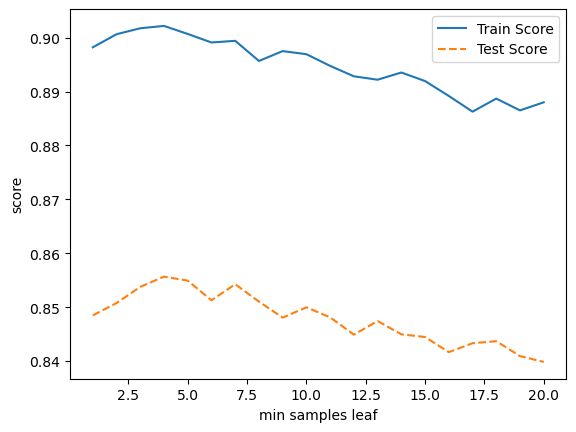

In [ ]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()
plt.show()

#### 최적 파라미터 : min_samples_split

In [ ]:
train_score=[]; test_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split :
    gb= GradientBoostingRegressor(n_estimators=40,random_state=6659, min_samples_leaf=7, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

In [ ]:
df_score_leaf= pd.DataFrame()
df_score_leaf["MinSampleSplit"] =para_split
df_score_leaf["TrainScore"]= train_score
df_score_leaf["TestScore"]=test_score
df_score_leaf.round(3)

,MinSampleSplit,TrainScore,TestScore
0,4,0.899,0.854
1,6,0.899,0.854
2,8,0.899,0.854
3,10,0.899,0.854
4,12,0.899,0.854
5,14,0.899,0.854
6,16,0.899,0.852
7,18,0.899,0.852
8,20,0.899,0.852
9,22,0.896,0.852


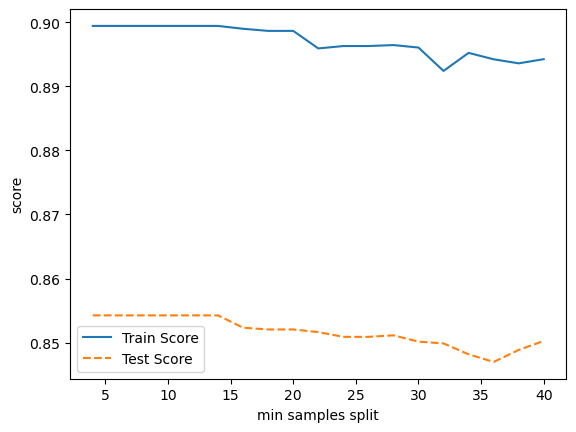

In [ ]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()
plt.show()

#### 최적 파라미터 : max depth

In [ ]:
train_score=[]; test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth :
    gb= GradientBoostingRegressor(n_estimators=40,random_state=6659, min_samples_leaf=7, min_samples_split=22, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

In [ ]:
df_score_depth= pd.DataFrame()
df_score_depth["depth"]=para_depth
df_score_depth["TrainScore"]= train_score
df_score_depth["TestScore"]=test_score
df_score_depth.round(3)

,depth,TrainScore,TestScore
0,1,0.665,0.629
1,2,0.836,0.788
2,3,0.896,0.852
3,4,0.938,0.878
4,5,0.959,0.888
5,6,0.968,0.894
6,7,0.973,0.896
7,8,0.977,0.898
8,9,0.977,0.894
9,10,0.979,0.897


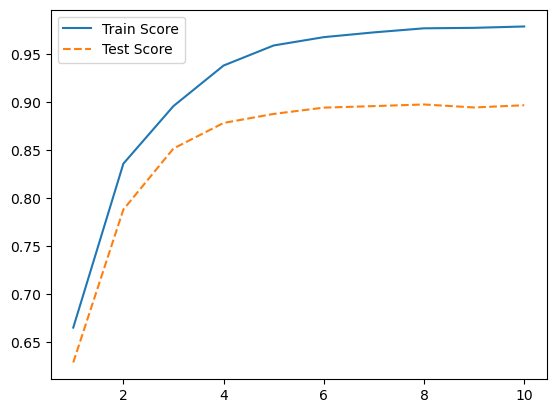

In [ ]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

#### 최적 파라미터 : learning rate

In [ ]:
train_score=[]; test_score=[]
para_lr=[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr :
    gb= GradientBoostingRegressor(n_estimators=30,random_state=6659, min_samples_leaf=11, min_samples_split=22, max_depth=5,learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

In [ ]:
df_score_lr= pd.DataFrame()
df_score_lr["LearningRate"]=para_lr
df_score_lr["TrainScore"]= train_score
df_score_lr["TestScore"]=test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.939,0.869
1,0.2,0.967,0.907
2,0.3,0.974,0.910
3,0.4,0.978,0.922
4,0.5,0.980,0.916
5,0.6,0.982,0.918
6,0.7,0.985,0.907
7,0.8,0.983,0.900
8,0.9,0.985,0.880


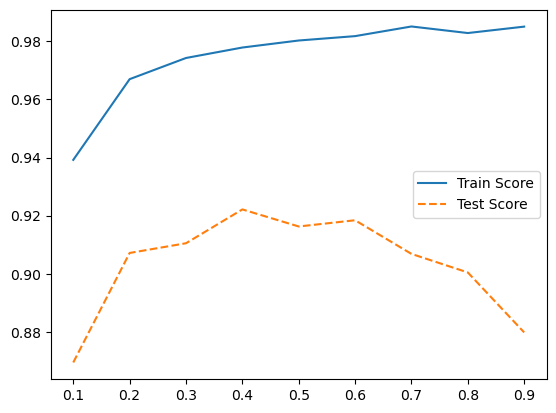

In [ ]:
plt.plot(para_lr, train_score, linestyle="-", label="Train Score")
plt.plot(para_lr, test_score, linestyle="--", label="Test Score")
plt.legend()
plt.show()

## 최종 모델 : Gradient Boosting

In [ ]:
gb_final= GradientBoostingRegressor(n_estimators=30,random_state=6659, min_samples_leaf=11, min_samples_split=22, max_depth=4,learning_rate=0.4)
gb_final.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.952
Score on test set:0.893


In [ ]:
test_pred=gb_final.predict(df_test_x)
pd.DataFrame({'실제값':df_test_y,'예측값':test_pred}).reset_index(drop=True)

#### 변수 중요도 : Gradient Boosting

In [ ]:
v_feature_name= df_train_x.columns
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= gb_final.feature_importances_
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

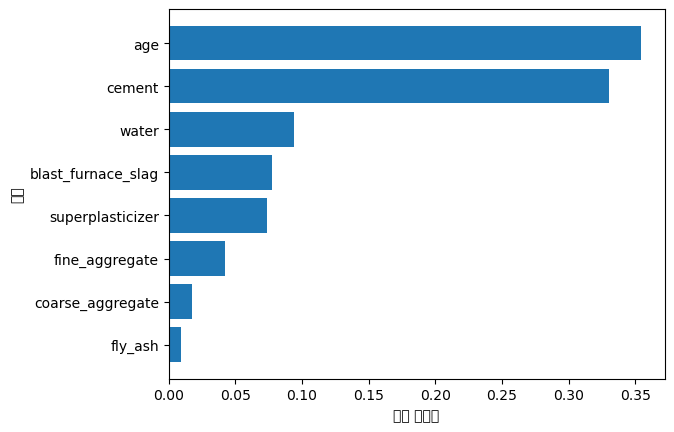

In [ ]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.show()

## SVM

In [14]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score
#confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

from statsmodels.api import Logit
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
matplotlib.rc("font", family= 'Noto Sans CJK JP')
from scipy import stats

In [15]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/SCALE불량.csv", encoding='euc-kr')
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [ ]:
# x,y로 분리
df_raw_x=df_raw.drop("scale", axis=1, inplace=False)
df_raw_y=df_raw["scale"]
df_raw_y.value_counts()

In [ ]:
# 불량 -> 0 , 양품 -> 1
df_raw_y=df_raw["scale"].replace({"불량": 0, "양품":1})
df_raw_y.value_counts()


In [ ]:
# 표준화
v_feature_names=df_raw_x.columns
scaler=StandardScaler()
df_x_scaled=scaler.fit_transform(df_raw_x)
df_x_scaled=pd.DataFrame(df_x_scaled, columns=v_feature_names)
display("Scale 변환 전:", df_raw_x.head())
display("Scale 변환 후:", df_x_scaled.head())

In [ ]:
# train, test split 7:3
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_scaled,df_raw_y,test_size=0.3, random_state=6659)
print("분할 전 설명변수 데이터:", df_x_scaled.shape)
print("분할 후 설명변수 데이터: Train", df_train_x.shape,"Test", df_test_x.shape)

In [ ]:
# default model
svm_uncustomized= SVC(random_state=6659)
svm_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.981
Accuracy on test set: 0.992


In [ ]:
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 6659, True, 0.001, False])


#### 최적 파라미터 : C

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_c=[10**c for c in range(-2,3)]

for v_C in para_c :
    svm= SVC(C=v_C,random_state=6659)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

In [ ]:
df_accuracy_c= pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainScore"]= train_accuracy
df_accuracy_c["TestScore"]=test_accuracy
df_accuracy_c.round(3)

,C,TrainScore,TestScore
0,0.01,0.917,0.953
1,0.10,0.951,0.977
2,1.00,0.981,0.992
3,10.00,1.000,0.992
4,100.00,1.000,0.984


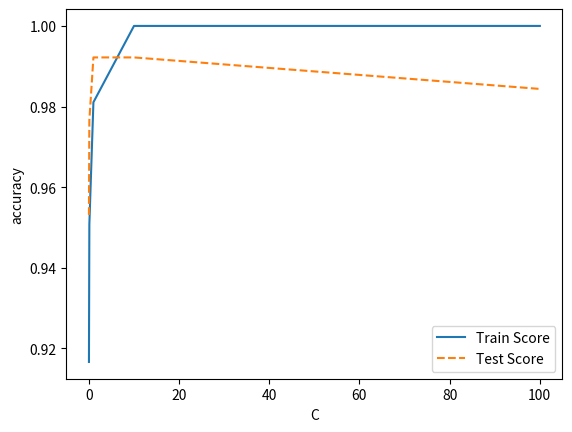

In [ ]:
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_c, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("C"); plt.ylabel("accuracy")
plt.legend()

#### 최적 파라미터 : gamma

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_gamma=[10**gamma for gamma in range(-2,3)]

for v_gamma in para_gamma:
    svm= SVC(gamma=v_gamma,random_state=6659)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

In [ ]:
df_accuracy_gamma= pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainScore"]= train_accuracy
df_accuracy_gamma["TestScore"]=test_accuracy
df_accuracy_gamma.round(3)


,gamma,TrainScore,TestScore
0,0.01,0.981,1.000
1,0.10,1.000,0.953
2,1.00,1.000,0.633
3,10.00,1.000,0.625
4,100.00,1.000,0.625


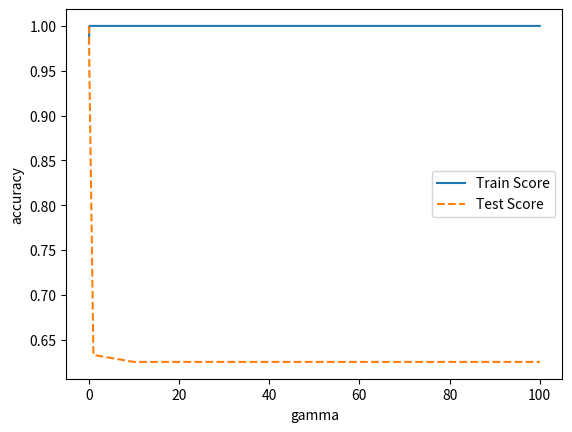

In [ ]:
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("gamma"); plt.ylabel("accuracy")
plt.legend()

## 최종모델 : SVM

In [ ]:
svc_final= SVC(gamma=0.01,C=0.1,random_state=6659)
svc_final.fit(df_train_x, df_train_y)
y_pred=svc_final.predict(df_test_x)


In [ ]:
print("Train Accurary: {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
print("Test Accuracy: {:.3f}".format(svc_final.score(df_test_x,df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accurary: 0.917
Test Accuracy: 0.953
Test Confusion Matrix:
[[75  5]
 [ 1 47]]
              precision    recall  f1-score   support

           0      0.987     0.938     0.962        80
           1      0.904     0.979     0.940        48

    accuracy                          0.953       128
   macro avg      0.945     0.958     0.951       128
weighted avg      0.956     0.953     0.953       128



### 최적 파라미터 : GridSearch

In [ ]:
estimator=SVC(random_state=6659)
param_grid={"C":para_c,"gamma":para_gamma}

grid_svc=GridSearchCV(estimator,param_grid,scoring="accuracy", n_jobs= -1)
grid_svc.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_svc.best_estimator_))
print("\nbest parameter:\n{}".format(grid_svc.best_params_))
print("\nbest score:\n{}".format(grid_svc.best_score_.round(3)))

best estimator model: 
SVC(C=10, gamma=0.01, random_state=6659)

best parameter:
{'C': 10, 'gamma': 0.01}

best score:
0.985


## 최종모델 : SVM (GridSearch)

In [ ]:
svc_final= SVC(gamma=0.01,C=1,random_state=6659)
svc_final.fit(df_train_x, df_train_y)
y_pred=svc_final.predict(df_test_x)


In [ ]:
print("Train Accurary: {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
print("Test Accuracy: {:.3f}".format(svc_final.score(df_test_x,df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accurary: 0.981
Test Accuracy: 1.000
Test Confusion Matrix:
[[80  0]
 [ 0 48]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        80
           1      1.000     1.000     1.000        48

    accuracy                          1.000       128
   macro avg      1.000     1.000     1.000       128
weighted avg      1.000     1.000     1.000       128



# 인공신경망

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [16]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/SCALE불량.csv", encoding='euc-kr')
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [ ]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [ ]:
# x,y 분리
df_raw_x=df_raw.drop("scale", axis=1, inplace=False)
df_raw_y=df_raw["scale"]
df_raw_y.value_counts()

In [ ]:
# 불량 => 0  양품 => 1
df_raw_y=df_raw["scale"].replace({"불량": 0, "양품":1})
df_raw_y.value_counts()

In [ ]:
# 표준화
v_feature_names=df_raw_x.columns
scaler=StandardScaler()
df_x_scaled=scaler.fit_transform(df_raw_x)
df_x_scaled=pd.DataFrame(df_x_scaled, columns=v_feature_names)
display("Scale 변환 전:", df_raw_x.head())
display("Scale 변환 후:", df_x_scaled.head())


In [ ]:
# Training, Test 7:3 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_scaled, df_raw_y,test_size=0.3, random_state=1234)
print("분할 전 Train Data:{}".format(df_train_x.shape))
print("분할 후 Test Data:{}".format(df_test_x.shape))

분할 전 Train Data:(192, 30)
분할 후 Test Data:(128, 30)


In [16]:
# default model
nn_uncust=MLPClassifier(random_state=6659)
nn_uncust.fit(df_train_x,df_train_y)
print("Accurary on training: {:.3f}".format(nn_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_uncust.score(df_test_x,df_test_y)))

NameError: name 'df_train_x' is not defined

In [ ]:
print(nn_uncust.get_params().keys())
print(nn_uncust.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 6659, True, 'adam', 0.0001, 0.1, False, False])


#### 최적 파라미터 : hidden

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_hidden=[5*hidden for hidden in range(1,21)]

print(para_hidden)
for v_hidden in para_hidden:
    nn= MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state=6659)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [ ]:
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["TrainScore"]= train_accuracy
df_accuracy_hidden["TestScore"]=test_accuracy
df_accuracy_hidden.round(3)


,HiddenLayer,TrainScore,TestScore
0,5,0.401,0.242
1,10,0.401,0.242
2,15,0.932,0.891
3,20,0.917,0.898
4,25,0.922,0.945
5,30,0.875,0.844
6,35,0.917,0.898
7,40,0.599,0.758
8,45,0.891,0.938
9,50,0.927,0.914


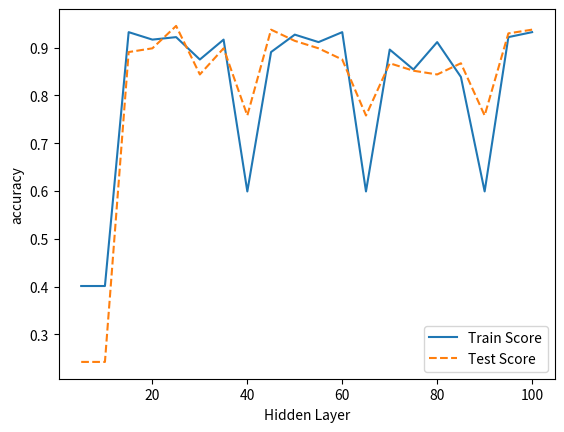

In [ ]:
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_hidden, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Hidden Layer"); plt.ylabel("accuracy")
plt.legend()

#### 최적 파라미터 : function

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_function=["logistic","tanh","relu"]

for v_function in para_function:
    nn= MLPClassifier(activation=v_function,hidden_layer_sizes=(50,50),random_state=6659)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))

In [ ]:
df_accuracy_function= pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["TrainScore"]= train_accuracy
df_accuracy_function["TestScore"]=test_accuracy
df_accuracy_function.round(3)


,ActivationFunction,TrainScore,TestScore
0,logistic,0.948,0.883
1,tanh,0.943,0.883
2,relu,0.927,0.914


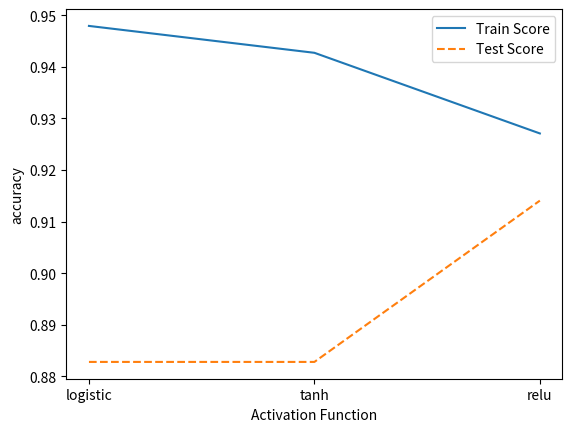

In [ ]:
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_function, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Activation Function"); plt.ylabel("accuracy")
plt.legend()

#### 최적 파라미터 : Solver

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_solver=["lbfgs","sgd","adam"]

for v_solver in para_solver:
    nn= MLPClassifier(solver=v_solver,activation="relu",hidden_layer_sizes=(50,50),random_state=6659)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))

In [ ]:
df_accuracy_solver= pd.DataFrame()
df_accuracy_solver["Solver"]=para_solver
df_accuracy_solver["TrainScore"]= train_accuracy
df_accuracy_solver["TestScore"]=test_accuracy
df_accuracy_solver.round(3)


,Solver,TrainScore,TestScore
0,lbfgs,0.865,0.883
1,sgd,0.599,0.758
2,adam,0.927,0.914


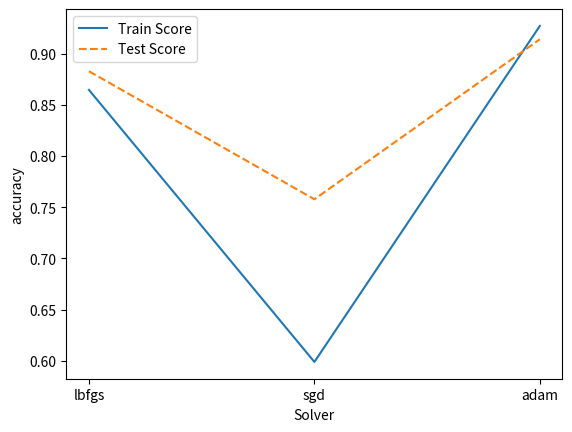

In [ ]:
plt.plot(para_solver, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_solver, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Solver"); plt.ylabel("accuracy")
plt.legend()

#### 최적 파라미터 : batch size

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_batch=[20*batch for batch in range(1,10)]

print(para_batch)
for v_batch in para_batch:
    nn= MLPClassifier(batch_size=v_batch,solver="adam",activation="relu",hidden_layer_sizes=(50,50),random_state=6659)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))

[20, 40, 60, 80, 100, 120, 140, 160, 180]


In [ ]:
df_accuracy_batch= pd.DataFrame()
df_accuracy_batch["Mini batch"]=para_batch
df_accuracy_batch["TrainScore"]= train_accuracy
df_accuracy_batch["TestScore"]=test_accuracy
df_accuracy_batch.round(3)


,Mini batch,TrainScore,TestScore
0,20,0.875,0.812
1,40,0.922,0.906
2,60,0.885,0.852
3,80,0.932,0.914
4,100,0.901,0.875
5,120,0.932,0.922
6,140,0.917,0.914
7,160,0.865,0.828
8,180,0.740,0.836


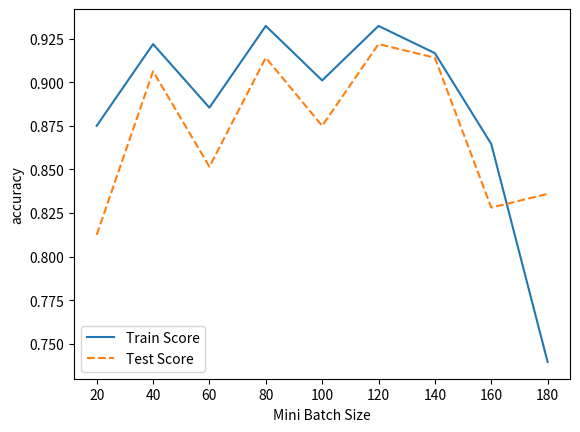

In [ ]:
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_batch, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Mini Batch Size"); plt.ylabel("accuracy")
plt.legend()

## 최종모델 : 인공신경망

In [ ]:
nn_final= MLPClassifier(hidden_layer_sizes=(50,50),activation="relu",solver="adam",random_state=6659)
nn_final.fit(df_train_x,df_train_y)
y_pred=nn_final.predict(df_test_x)


In [ ]:
print("Train Accurary: {:.3f}".format(nn_final.score(df_train_x,df_train_y)))
print("Test Accuracy: {:.3f}".format(nn_final.score(df_test_x,df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accurary: 0.927
Test Accuracy: 0.914
Test Confusion Matrix:
[[89  8]
 [ 3 28]]
              precision    recall  f1-score   support

           0      0.967     0.918     0.942        97
           1      0.778     0.903     0.836        31

    accuracy                          0.914       128
   macro avg      0.873     0.910     0.889       128
weighted avg      0.921     0.914     0.916       128



# KNN

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [10]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/SCALE불량.csv", encoding='euc-kr')
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [ ]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [ ]:
# x,y 분리
df_raw_x=df_raw.drop("scale", axis=1, inplace=False)
df_raw_y=df_raw["scale"]
df_raw_y.value_counts()

In [ ]:
# 불량 => 0 양품 => 1
df_raw_y=df_raw["scale"].replace({"불량": 0, "양품":1})
df_raw_y.value_counts()

In [ ]:
# 표준화
v_feature_names=df_raw_x.columns
scaler=StandardScaler()
df_x_scaled=scaler.fit_transform(df_raw_x)
df_x_scaled=pd.DataFrame(df_x_scaled, columns=v_feature_names)
display("Scale 변환 전:", df_raw_x.head())
display("Scale 변환 후:", df_x_scaled.head())

In [ ]:
# Training Test 7:3 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_scaled, df_raw_y,test_size=0.3, random_state=6659)
print("분할 전 Train Data:{}".format(df_train_x.shape))
print("분할 후 Test Data:{}".format(df_test_x.shape))

분할 전 Train Data:(192, 30)
분할 후 Test Data:(128, 30)


In [ ]:
# default model
knn_uncust=KNeighborsClassifier()
knn_uncust.fit(df_train_x,df_train_y)
print("Accurary on training: {:.3f}".format(knn_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_uncust.score(df_test_x,df_test_y)))

In [ ]:
print(knn_uncust.get_params().keys())
print(knn_uncust.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


#### 최적파라미터 : 이웃 수

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

In [ ]:
df_accuracy_neighbors= pd.DataFrame()
df_accuracy_neighbors["Neighbors"]=para_n_neighbors
df_accuracy_neighbors["TrainScore"]= train_accuracy
df_accuracy_neighbors["TestScore"]=test_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,TrainScore,TestScore
0,1,1.000,0.898
1,2,0.953,0.906
2,3,0.943,0.914
3,4,0.948,0.914
4,5,0.932,0.922
5,6,0.948,0.930
6,7,0.938,0.914
7,8,0.938,0.898
8,9,0.938,0.914
9,10,0.922,0.898


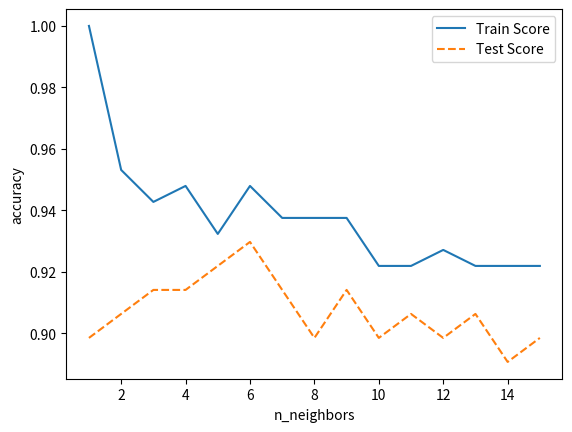

In [ ]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("n_neighbors"); plt.ylabel("accuracy")
plt.legend()

#### 최적 파라미터 : uniform vs distance

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(1,11)]*2
para_weights=(["uniform"])*10+(["distance"]*10)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights) :
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, weights= v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

In [ ]:
df_accuracy_weights= pd.DataFrame()
df_accuracy_weights["Neighbors"]=para_n_neighbors
df_accuracy_weights["Weights"]=para_weights
df_accuracy_weights["TrainAccuracy"]= train_accuracy
df_accuracy_weights["TestAccuracy"]=test_accuracy
df_accuracy_weights.round(3)


,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.898
1,2,uniform,0.953,0.906
2,3,uniform,0.943,0.914
3,4,uniform,0.948,0.914
4,5,uniform,0.932,0.922
5,6,uniform,0.948,0.930
6,7,uniform,0.938,0.914
7,8,uniform,0.938,0.898
8,9,uniform,0.938,0.914
9,10,uniform,0.922,0.898


In [ ]:
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors", columns="Weights", values=["TrainAccuracy","TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.898438  0.898438
2                   1.0  0.953125     0.898438  0.906250
3                   1.0  0.942708     0.914062  0.914062
4                   1.0  0.947917     0.898438  0.914062
5                   1.0  0.932292     0.921875  0.921875
6                   1.0  0.947917     0.906250  0.929688
7                   1.0  0.937500     0.914062  0.914062
8                   1.0  0.937500     0.906250  0.898438
9                   1.0  0.937500     0.906250  0.914062
10                  1.0  0.921875     0.906250  0.898438

In [ ]:
level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.898438,0.898438
2,1.0,0.953125,0.898438,0.906250
3,1.0,0.942708,0.914062,0.914062
4,1.0,0.947917,0.898438,0.914062
5,1.0,0.932292,0.921875,0.921875


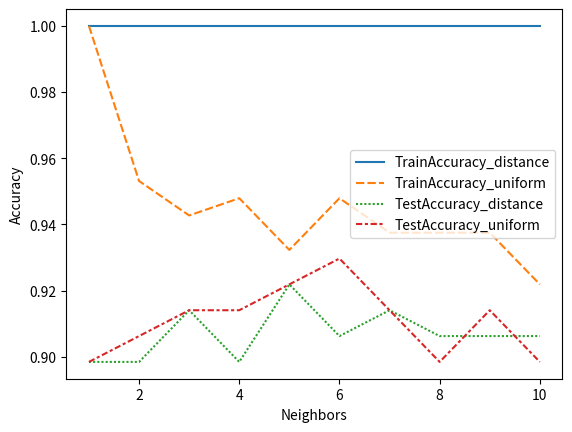

In [ ]:
sns.lineplot(data=df_accuracy_weights_pivot)
plt.ylabel("Accuracy");

#### 최적 파라미터 : euclidean vs manhattan

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(1,11)]*2
para_metric=["euclidean"]*10+["manhattan"]*10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric) :
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights="uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

In [ ]:
df_accuracy_metric= pd.DataFrame()
df_accuracy_metric["Neighbors"]=para_n_neighbors
df_accuracy_metric["Metric"]=para_metric
df_accuracy_metric["TrainAccuracy"]= train_accuracy
df_accuracy_metric["TestAccuracy"]=test_accuracy
df_accuracy_metric.round(3)


,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,euclidean,1.000,0.898
1,2,euclidean,0.953,0.906
2,3,euclidean,0.943,0.914
3,4,euclidean,0.948,0.914
4,5,euclidean,0.932,0.922
5,6,euclidean,0.948,0.930
6,7,euclidean,0.938,0.914
7,8,euclidean,0.938,0.898
8,9,euclidean,0.938,0.914
9,10,euclidean,0.922,0.898


In [ ]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index="Neighbors", columns="Metric", values=["TrainAccuracy","TestAccuracy"])
df_accuracy_metric_pivot

TrainAccuracy           TestAccuracy          
Metric        euclidean manhattan    euclidean manhattan
Neighbors                                               
1              1.000000  1.000000     0.898438  0.898438
2              0.953125  0.963542     0.906250  0.906250
3              0.942708  0.942708     0.914062  0.906250
4              0.947917  0.937500     0.914062  0.937500
5              0.932292  0.932292     0.921875  0.914062
6              0.947917  0.947917     0.929688  0.921875
7              0.937500  0.937500     0.914062  0.921875
8              0.937500  0.927083     0.898438  0.929688
9              0.937500  0.942708     0.914062  0.914062
10             0.921875  0.932292     0.898438  0.906250

In [ ]:
level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns=level0+"_"+level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TestAccuracy_euclidean,TestAccuracy_manhattan
Neighbors,,,,
1,1.000000,1.000000,0.898438,0.898438
2,0.953125,0.963542,0.906250,0.906250
3,0.942708,0.942708,0.914062,0.906250
4,0.947917,0.937500,0.914062,0.937500
5,0.932292,0.932292,0.921875,0.914062


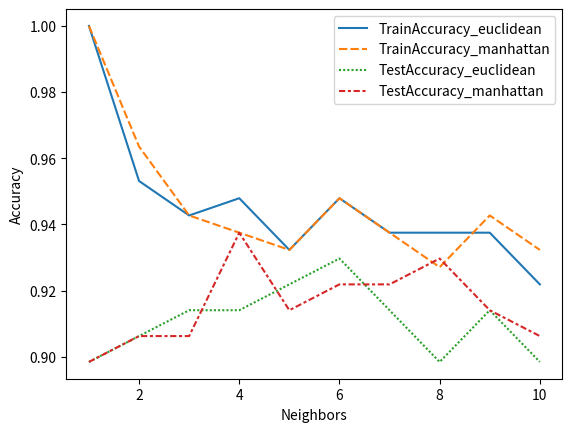

In [ ]:
sns.lineplot(data=df_accuracy_metric_pivot)
plt.ylabel("Accuracy");

## 최종모델 : KNN

In [12]:
knn_model= KNeighborsClassifier(n_neighbors=6, weights="uniform", metric="euclidean")
knn_model.fit(df_train_x,df_train_y)
y_pred=knn_model.predict(df_test_x)


NameError: name 'df_train_x' is not defined

In [ ]:
print("Train Accurary: {:.3f}".format(knn_model.score(df_train_x,df_train_y)))
print("Test Accuracy: {:.3f}".format(knn_model.score(df_test_x,df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accurary: 0.948
Test Accuracy: 0.930
Test Confusion Matrix:
[[78  2]
 [ 7 41]]
              precision    recall  f1-score   support

           0      0.918     0.975     0.945        80
           1      0.953     0.854     0.901        48

    accuracy                          0.930       128
   macro avg      0.936     0.915     0.923       128
weighted avg      0.931     0.930     0.929       128

